In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anime-recommender-system-project-2025/submission.csv
/kaggle/input/anime-recommender-system-project-2025/train.csv
/kaggle/input/anime-recommender-system-project-2025/test.csv
/kaggle/input/anime-recommender-system-project-2025/anime.csv


In [2]:
# Load datasets
anime_df = pd.read_csv('/kaggle/input/anime-recommender-system-project-2025/anime.csv')
train_df = pd.read_csv('/kaggle/input/anime-recommender-system-project-2025/train.csv')
test_df = pd.read_csv('/kaggle/input/anime-recommender-system-project-2025/test.csv')
sample_submission = pd.read_csv('/kaggle/input/anime-recommender-system-project-2025/submission.csv')

# Check shapes
print(anime_df.shape)
print(train_df.shape)
print(test_df.shape)

(12294, 7)
(5703555, 3)
(633686, 2)


   user_id  anime_id  rating
0        1     11617      10
1        1     11757      10
2        1     15451      10
3        2     11771      10
4        3        20       8
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262 

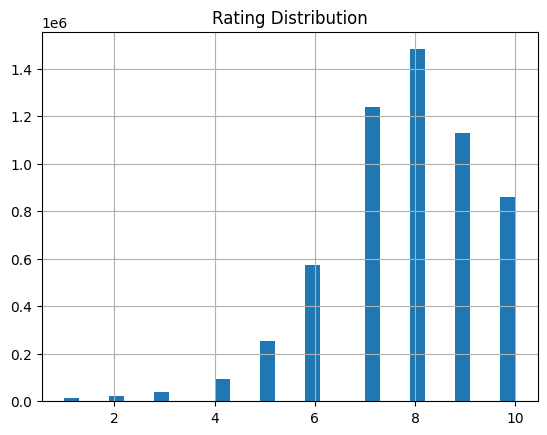

In [3]:
# Preview data
print(train_df.head())
print(anime_df.head())

# Distribution of ratings
import matplotlib.pyplot as plt
train_df['rating'].hist(bins=30)
plt.title("Rating Distribution")
plt.show()

In [4]:
!pip install scikit-surprise

from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Define a Reader object with the expected rating scale
reader = Reader(rating_scale=(1, 10))

# Load training data into Surprise format
data = Dataset.load_from_df(train_df[['user_id', 'anime_id', 'rating']], reader)

# Initialize model
model = SVD()

# Evaluate with cross-validation
cross_validate(model, data, measures=['RMSE'], cv=3, verbose=True)

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.1642  1.1652  1.1651  1.1648  0.0005  
Fit time          67.00   69.21   68.66   68.29   0.94    
Test time         23.78   21.37   21.72   22.29   1.06    


{'test_rmse': array([1.16418933, 1.16520384, 1.16513595]),
 'fit_time': (66.99948263168335, 69.20834350585938, 68.660719871521),
 'test_time': (23.777278900146484, 21.37252187728882, 21.72367787361145)}

In [15]:
# Train on full training set
trainset = data.build_full_trainset()
model.fit(trainset)

# Predict on test data
predictions = []
for _, row in test_df.iterrows():
    pred = model.predict(row['user_id'], row['anime_id']).est
    predictions.append(pred)

# Create submission
submission = test_df.copy()
submission['rating'] = predictions
submission.to_csv('/kaggle/working/submission.csv', index=False)